<a href="https://colab.research.google.com/github/Vnnie-Mun/AI-ML-short-exercises/blob/main/Accuracy_score_and_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


Data collection and processing

In [ ]:
#Loading the csv data to Pandas DataFrame
heart_data = pd.read_csv('/content/heart_disease_data.csv')

heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
#checking the distribution of the Target Variables
heart_data['target'].value_counts()

,count
target,
1,165
0,138


0-->Healthy heart

1-->Defective heart

Splitting the features and targets

In [7]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [8]:
print(X)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [9]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the data into training data and testing data

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [12]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training

In [13]:
model = LogisticRegression(max_iter = 1000)

In [14]:
#training the Logistic regression model with Training Data
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation


Accuracy score

In [18]:
from sklearn.metrics import accuracy_score

In [22]:
X_train_prediction= model.predict(X_train)
training_data_accuracy_score= accuracy_score(X_train_prediction,Y_train)
training_data_accuracy_score= training_data_accuracy_score*100
training_data_accuracy_score= round(training_data_accuracy_score,2)

In [24]:
print('Accuracy on Training data:',training_data_accuracy_score,'%')

Accuracy on Training data: 85.54 %


In [26]:
X_test_prediction= model.predict(X_test)
test_data_accuracy_score= accuracy_score(X_test_prediction,Y_test)
test_data_accuracy_score= test_data_accuracy_score*100
test_data_accuracy_score= round(test_data_accuracy_score,2)


In [28]:
print('Accuracy score on test data:',test_data_accuracy_score,'%')

Accuracy score on test data: 80.33 %


Confusion Matrix


In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cf_matrix = confusion_matrix(X_test_prediction,Y_test)

In [32]:
print(cf_matrix)

[[22  6]
 [ 6 27]]


True Negative: 22
False Positive: 6
False Negative: 6
True Positive: 27


<Axes: >

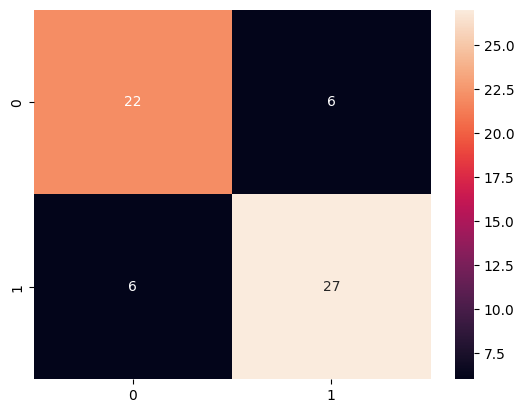

In [36]:
tn,fp,fn,tp = cf_matrix.ravel()
print('True Negative:',tn)
print('False Positive:',fp)
print('False Negative:',fn)
print('True Positive:',tp)


import seaborn as sns
sns.heatmap(cf_matrix,annot = True)


